# Imports

In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent); os.chdir(set_path)

In [2]:
import torch
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from TargetDistributions.MoG import MoG
from TargetDistributions.Guassian_FullCov import Guassian_FullCov
from FittedModels.Models.DiagonalGaussian import DiagonalGaussian
from Utils import plot_func2D, MC_estimate_true_expectation, plot_distribution
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils import plot_history
import matplotlib.pyplot as plt
import torch

from FittedModels.experimental.adversarial_sampler import LearntDistributionManager, plot_distributions

# First with simple model

TODO


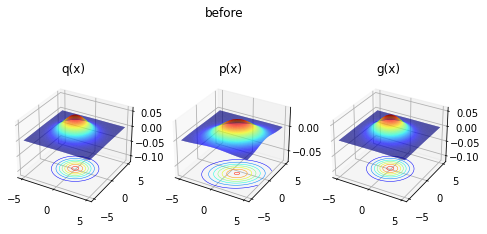

loss: -0.06482257334887981, mean log p_x -4.327319440841674: 100%|████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:15<00:00, 317.34it/s]


true expectation is 0.31400972604751587 
estimate before training is 0.29738959670066833 
estimate after training is 0.31834954023361206


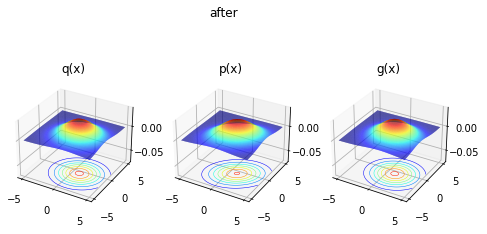

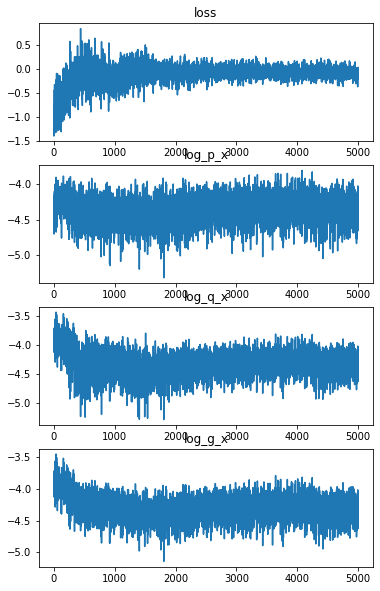

means (Parameter containing:
tensor([ 1.1335, -0.8256], requires_grad=True), tensor([ 1.1530, -0.8390]))
learnt dist is scale tril tensor([[2.1893, 0.0000],
        [0.0000, 2.0041]], grad_fn=<ExpandBackward>)
target dist scale tril tensor([[2.2653, 0.0000],
        [0.5250, 1.9823]])
learnt dist log_std is Parameter containing:
tensor([1.5672, 1.3904], requires_grad=True)


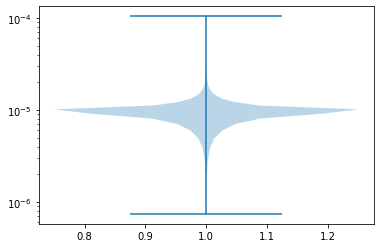

In [3]:
epochs = 5000
dim = 2
target = Guassian_FullCov(dim=dim, scale_covariance=4)
learnt_sampler = DiagonalGaussian(dim=dim)
adversarial_distribution = DiagonalGaussian(dim=dim)
tester = LearntDistributionManager(target, learnt_sampler, adversarial_distribution, VanillaImportanceSampling)
if dim == 2:
    fig_before = fig_before_train = plot_distributions(tester, title="before")
expectation_before, sampling_weights_before = tester.estimate_expectation()
plt.show()

history = tester.train(epochs)
expectation, info_dict = tester.estimate_expectation(int(1e5))

true_expectation = torch.sum(tester.target_dist.mean)

print(f"true expectation is {true_expectation} \n"
      f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation}")

if dim == 2:
    fig_after_train = plot_distributions(tester, title="after")
    plt.show()

figure, axs = plt.subplots(len(history), 1, figsize=(6, 10))
for i, key in enumerate(history):
    axs[i].plot(history[key])
    axs[i].set_title(key)
    if key == "alpha_divergence":
        axs[i].set_yscale("log")
plt.show()

plt.violinplot([info_dict["normalised_sampling_weights"]])
plt.yscale("log")

print(f"means {tester.learnt_sampling_dist.means, tester.target_dist.loc}")
print(f"learnt dist is scale tril {tester.learnt_sampling_dist.distribution.scale_tril}")
print(f"target dist scale tril {tester.target_dist.scale_tril}")
print(f"learnt dist log_std is {tester.learnt_sampling_dist.log_std}")

# Now let's try with flo on a difficult problem

 looks like flow is struggling to learn - may need to calculate DReG for this

In [3]:
from FittedModels.Models.Constained_Diagonal_Gaussian import DiagonalGaussian

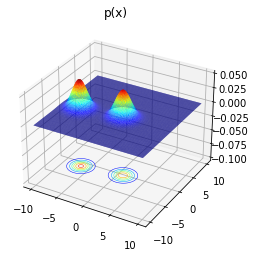

In [15]:
torch.manual_seed(2)
epochs = 500
dim = 2
n_samples_estimation = int(1e4)
target = MoG(dim=dim, n_mixes=2, min_cov=1)
fig = plot_distribution(target)

In [40]:
torch.manual_seed(0)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=3, prior_scaling=10) #, flow_type="RealNVP"
#adversarial_distribution = DiagonalGaussian(dim=dim, pre_sigmoid_std_initial_scaling=1, std_min=-1, std_max=10)
torch.manual_seed(0)
adversarial_distribution = FlowModel(x_dim=dim, n_flow_steps=3, prior_scaling=10) 
tester = LearntDistributionManager(target, learnt_sampler, adversarial_distribution, VanillaImportanceSampling)
expectation_before, sampling_weights_before = tester.estimate_expectation()

TODO


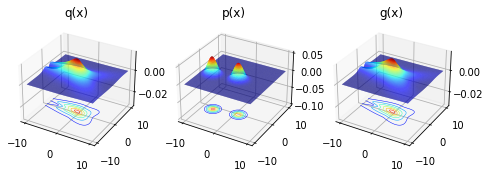

In [41]:
fig_before_train = plot_distributions(tester, range=20)

### Now let's train flow for a bit

In [9]:
history = tester.train(1000, n_switches=1, Train_adversarial_init=False)

loss: -2.086028196811676, mean log p_x -7.016151494979859: 100%|███████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.98it/s]


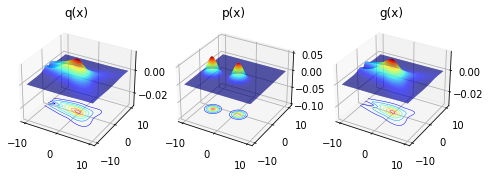

In [10]:
fig = plot_distributions(tester, range=20)

NaN encountered in loss history
NaN encountered in log_p_x history
NaN encountered in log_q_x history
NaN encountered in log_g_x history


(<Figure size 432x720 with 4 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>,
        <AxesSubplot:title={'center':'log_p_x'}>,
        <AxesSubplot:title={'center':'log_q_x'}>,
        <AxesSubplot:title={'center':'log_g_x'}>], dtype=object))

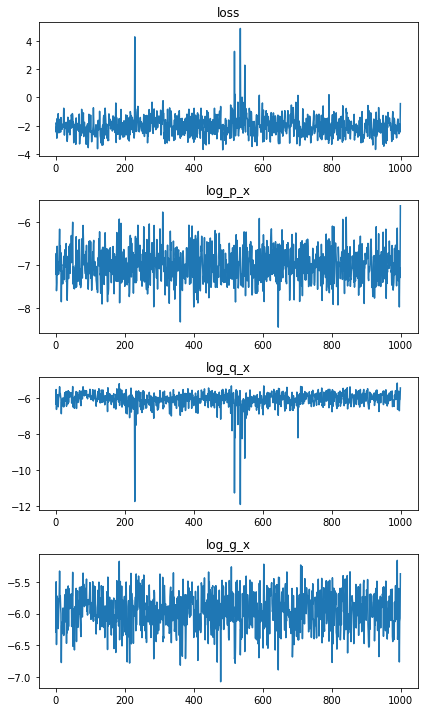

In [11]:
plot_history(history)

### Let's train adversarial only for a bit

In [23]:
history = tester.train(500, n_switches=1, Train_adversarial_init=True)

loss: -2.335750102996826, mean log p_x -7.43882942199707:   3%|██▌                                                                                    | 15/500 [00:00<00:10, 48.16it/s]


ValueError: The value argument must be within the support

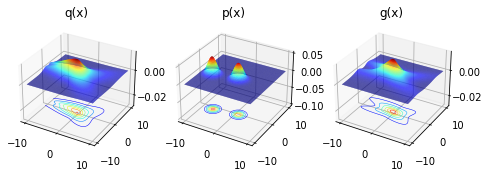

In [24]:
fig = plot_distributions(tester, range=20)

In [25]:
import numpy as np

(0.0, 1000.0)

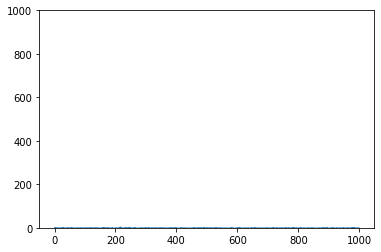

In [26]:
plt.plot(history["loss"])
plt.ylim([0, 1000])

(-100.0, 0.0)

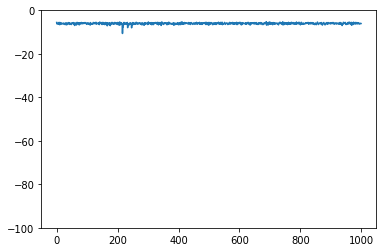

In [27]:
plt.plot(history['log_q_x'])
plt.ylim([-100, 0])

NaN encountered in loss history
NaN encountered in log_p_x history
NaN encountered in log_q_x history
NaN encountered in log_g_x history


(<Figure size 432x720 with 4 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>,
        <AxesSubplot:title={'center':'log_p_x'}>,
        <AxesSubplot:title={'center':'log_q_x'}>,
        <AxesSubplot:title={'center':'log_g_x'}>], dtype=object))

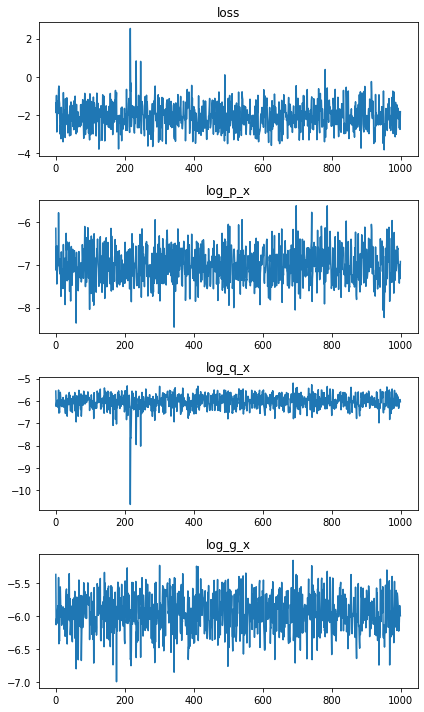

In [28]:
plot_history(history)

### Let's train

In [42]:
tester.optimizer_q.param_groups[0]["lr"] = 1e-2
tester.optimizer_g.param_groups[0]["lr"] = 1e-5

In [46]:
#history = tester.train(1000, n_switches=10, Train_adversarial_init=False, switcher=False)
tester.train(10000, batch_size=100)
expectation, info_dict = tester.estimate_expectation(int(1e5))

loss: 6527596.369619103, mean log p_x -7.1444769964218136: 100%|█████████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:42<00:00, 44.94it/s]


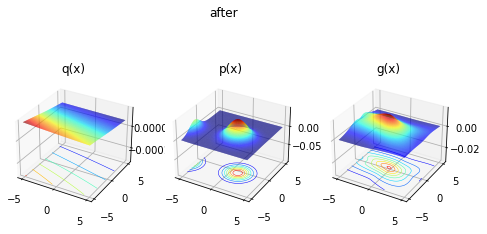

In [47]:
fig_after_train = plot_distributions(tester, title="after")

NaN encountered in loss history
NaN encountered in log_p_x history
NaN encountered in log_q_x history
NaN encountered in log_g_x history


(<Figure size 432x720 with 4 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>,
        <AxesSubplot:title={'center':'log_p_x'}>,
        <AxesSubplot:title={'center':'log_q_x'}>,
        <AxesSubplot:title={'center':'log_g_x'}>], dtype=object))

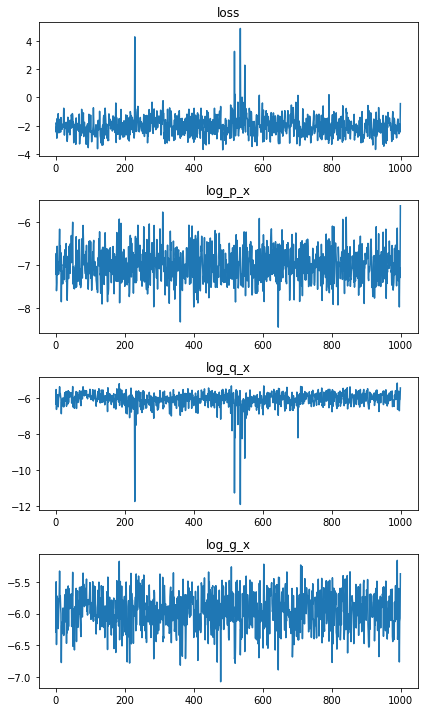

In [48]:
plot_history(history)